In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df = pd.read_csv('house-price-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [219]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500


In [220]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

- there are missing values found in the total_bedrooms. lets impute them instead of dropping them

# Impute missing values with mean for each column (numerical)
df_mean_imputed = df.fillna(df.mean())
print(df_mean_imputed)

# Impute missing values with median for each column (numerical)
df_median_imputed = df.fillna(df.median())
print(df_median_imputed)

# Impute missing values with mode for each column (categorical)
df_mode_imputed = df.fillna(df.mode().iloc[0])
print(df_mode_imputed)

# Impute missing values with a specific value, e.g., 0
df_specific_value_imputed = df.fillna(0)
print(df_specific_value_imputed)

# Forward fill to propagate the last valid observation forward
df_ffill_imputed = df.fillna(method='ffill')
print(df_ffill_imputed)

# Backward fill to propagate the next valid observation backward
df_bfill_imputed = df.fillna(method='bfill')
print(df_bfill_imputed)

In [221]:
# df_mean_imputed = df.fillna(df.mean())
# print(df_mean_imputed)

# Impute the total_bedrooms column with its mean value
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df.isnull().sum() # updated

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [222]:
# from sklearn.impute import SimpleImputer

# # Mean Imputation
# mean_imputer = SimpleImputer(strategy='mean')
# data_mean_imputed = mean_imputer.fit_transform(df)

# # Convert back to DataFrame
# data_mean_imputed = pd.DataFrame(data_mean_imputed, columns=df.columns)

from sklearn.impute import SimpleImputer

# Mean Imputation for the 'total_bedrooms' column
mean_imputer = SimpleImputer(strategy='mean')
df['total_bedrooms'] = mean_imputer.fit_transform(df[['total_bedrooms']])

print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_

In [223]:
from sklearn.impute import KNNImputer

# KNN Imputation for the 'total_bedrooms' column
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation only to the 'total_bedrooms' column
df[['total_bedrooms']] = knn_imputer.fit_transform(df[['total_bedrooms']])
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_

In [224]:
df.info() #no more missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [225]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [227]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7787,-118.06,33.90,37,1161,254.0,882,236,4.4167,<1H OCEAN,158000
17560,-121.88,37.32,40,1331,374.0,1276,389,2.7546,<1H OCEAN,172500
3070,-119.25,35.79,8,3271,797.0,2700,688,1.7418,INLAND,62200
17457,-120.44,34.68,6,2187,277.0,697,273,6.2685,NEAR OCEAN,307400
9235,-120.09,37.02,9,1608,297.0,1057,295,3.7143,INLAND,81600
...,...,...,...,...,...,...,...,...,...,...
15636,-122.41,37.80,52,3697,837.0,1446,711,5.8660,NEAR BAY,500001
10225,-117.89,33.87,32,1133,216.0,693,228,3.3594,<1H OCEAN,202100
20320,-119.15,34.25,36,3511,664.0,2965,695,4.0878,NEAR OCEAN,186800
1055,-121.86,39.78,12,7653,1578.0,3628,1494,3.0905,INLAND,117800


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

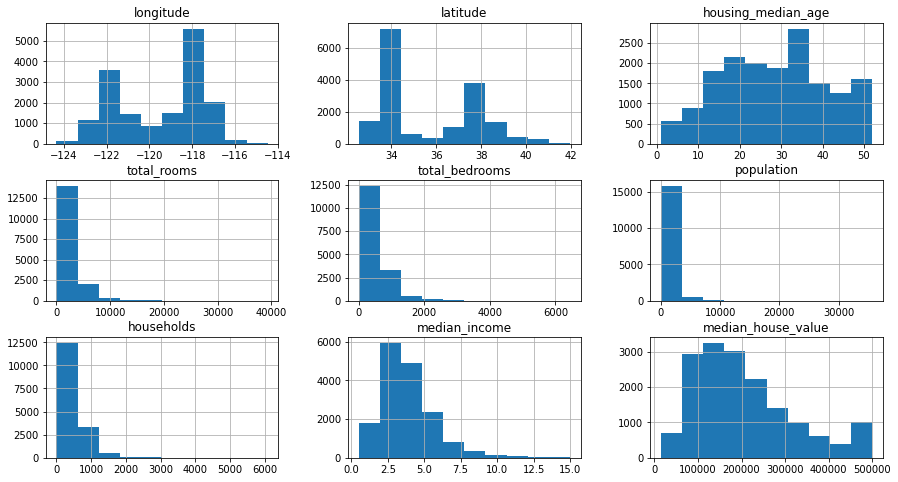

In [228]:
train_data.hist(figsize=(15,8)) #many showing skewed data
# Create histograms for the training data with specified figure size
# train_data.hist(figsize=(15, 8))

<AxesSubplot:>

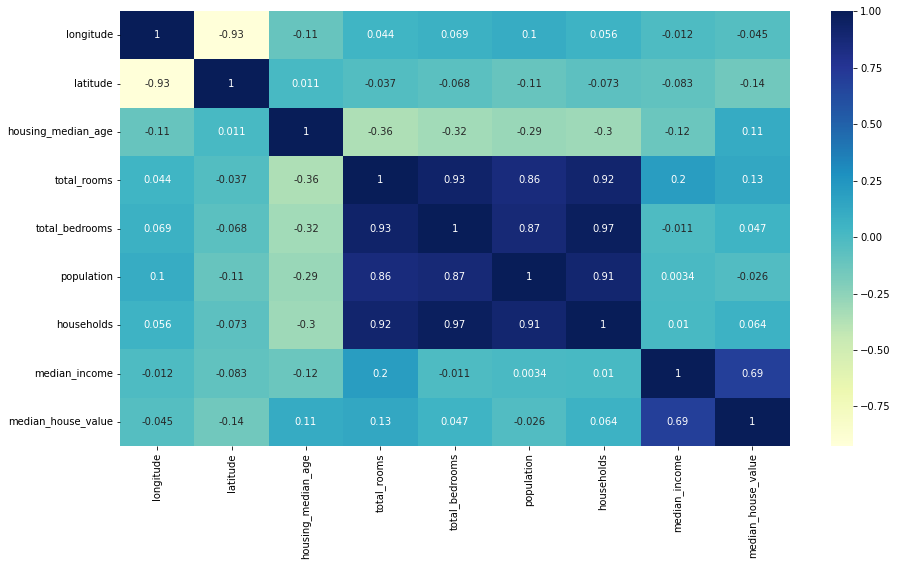

In [229]:
numeric_data = train_data.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15,8))
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')

In [230]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

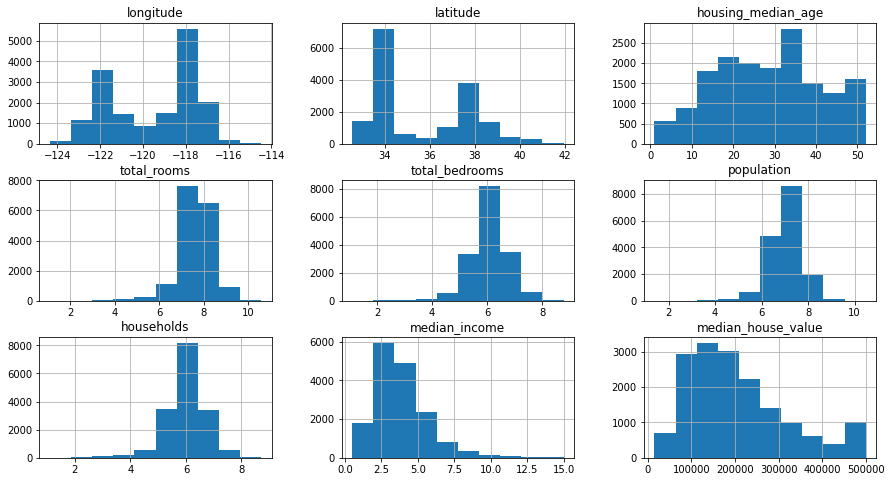

In [231]:
train_data.hist(figsize=(15,8)) #now looking morelike gaussian bell curve

In [232]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7278
INLAND        5248
NEAR OCEAN    2146
NEAR BAY      1838
ISLAND           2
Name: count, dtype: int64

In [233]:
# # Convert categorical column to dummy variables
# dummies = pd.get_dummies(train_data['ocean_proximity'])
# dummies

In [234]:
dummies = pd.get_dummies(train_data['ocean_proximity'])

# Convert dummies DataFrame to int64
dummies = dummies.astype('int64')

print(dummies)

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
7787           1       0       0         0           0
17560          1       0       0         0           0
3070           0       1       0         0           0
17457          0       0       0         0           1
9235           0       1       0         0           0
...          ...     ...     ...       ...         ...
15636          0       0       0         1           0
10225          1       0       0         0           0
20320          0       0       0         0           1
1055           0       1       0         0           0
5970           0       1       0         0           0

[16512 rows x 5 columns]


In [235]:
# train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

# Use pd.concat to join, avoiding column name conflicts
train_data = pd.concat([train_data.drop(['ocean_proximity'], axis=1), dummies], axis=1)

print(train_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7787     -118.06     33.90                  37     7.057898        5.541264   
17560    -121.88     37.32                  40     7.194437        5.926926   
3070     -119.25     35.79                   8     8.093157        6.682109   
17457    -120.44     34.68                   6     7.690743        5.627621   
9235     -120.09     37.02                   9     7.383368        5.697093   
...          ...       ...                 ...          ...             ...   
15636    -122.41     37.80                  52     8.215547        6.731018   
10225    -117.89     33.87                  32     7.033506        5.379897   
20320    -119.15     34.25                  36     8.163941        6.499787   
1055     -121.86     39.78                  12     8.942984        7.364547   
5970     -117.78     34.09                  32     7.880048        6.248043   

       population  households  median_income  media

<AxesSubplot:>

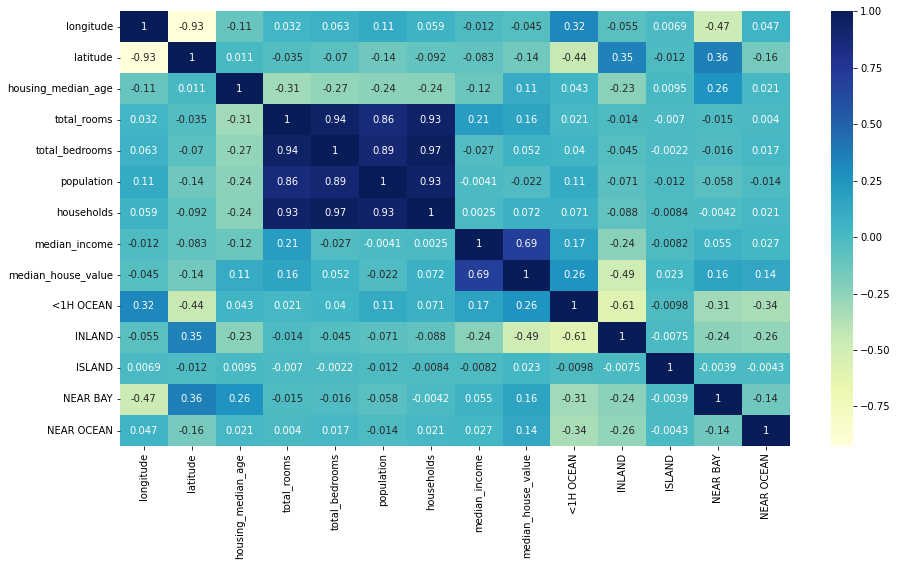

In [236]:
numeric_data = train_data.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15,8))
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

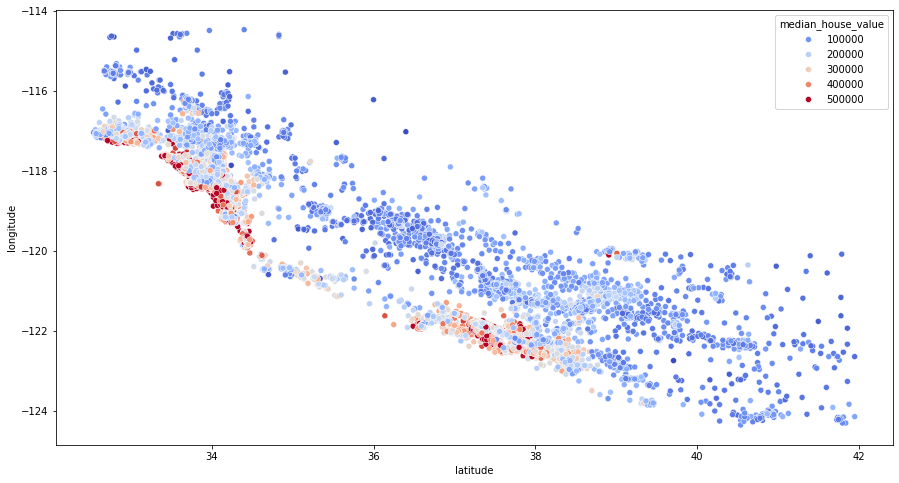

In [237]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

- red is more expensive, blue less expensive
- houses near the cost or island is more expensive.houses on inland (blue) not expensive and more population

In [238]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

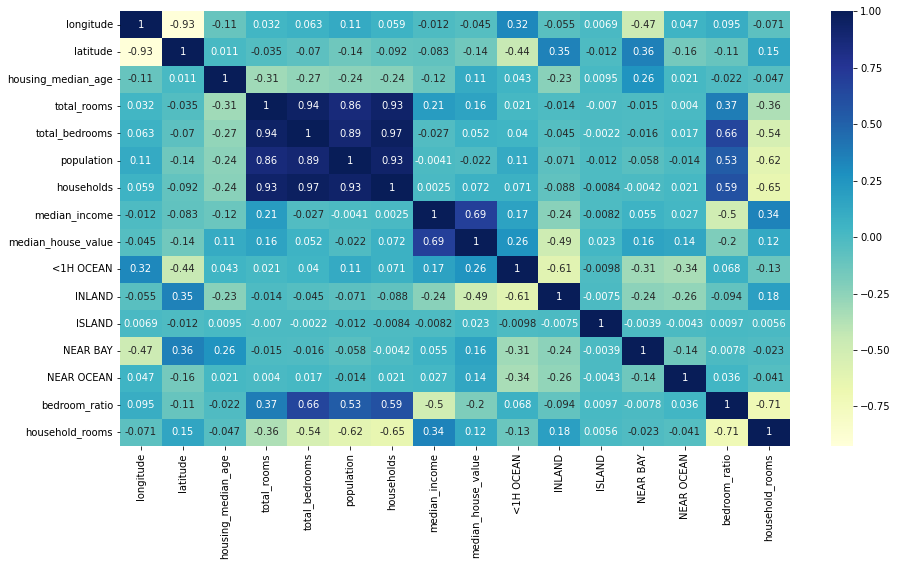

In [239]:
plt.figure(figsize=(15,8))
# Plot the heatmap
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

## Linear Regression

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [241]:
test_data = X_test.join(y_test)

test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_room'] = test_data['total_rooms'] / test_data['households']

In [242]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_room
14466,-117.24,32.82,20,7.811163,5.808142,6.595781,5.817111,7.2559,392300,False,False,False,False,True,0.743569,1.342791
3862,-118.44,34.16,33,7.388328,5.777652,6.364751,5.743003,4.0391,337500,True,False,False,False,False,0.781997,1.286492
5287,-118.47,34.05,22,8.559486,7.085064,7.625107,7.022868,4.7009,500001,True,False,False,False,False,0.827744,1.218802
13350,-117.63,34.02,13,8.489822,6.593045,7.930566,6.584791,5.6168,175400,False,True,False,False,False,0.776582,1.289308
441,-122.30,37.87,52,8.046870,6.620073,7.436028,6.529419,2.2208,144800,False,False,False,True,False,0.822689,1.232402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,-118.37,33.81,36,7.616776,5.828946,6.706862,5.823046,5.1271,458300,False,False,False,False,True,0.765277,1.308040
14715,-117.05,32.80,25,7.552762,5.525453,6.763885,5.537334,6.4797,249000,True,False,False,False,False,0.731580,1.363971
13216,-117.73,34.01,36,7.758333,5.973810,7.101676,5.963579,4.1250,213000,False,True,False,False,False,0.769986,1.300953
7780,-118.08,33.91,18,7.361375,5.983936,7.090910,5.902633,2.8950,146900,True,False,False,False,False,0.812883,1.247134


In [243]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [244]:
X_test_s = scaler.transform(X_test)

c:\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- household_room
Feature names seen at fit time, yet now missing:
- household_rooms

  warnings.warn(message, FutureWarning)


In [245]:
reg.score(X_test_s, y_test)

0.6441075079629122

## Random Forest

In [246]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [247]:
forest.score(X_test, y_test)

c:\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- household_room
Feature names seen at fit time, yet now missing:
- household_rooms

  warnings.warn(message, FutureWarning)


0.801991539721229

### Optimizing RF Model

How It Works with a Random Forest Model
Define the Model: Start with a Random Forest model.

Set the Hyperparameter Grid: Specify a dictionary of hyperparameters to tune. For Random Forest, common hyperparameters include:

- n_estimators: Number of trees in the forest.
- max_depth: Maximum depth of each tree.
- min_samples_split: Minimum number of samples required to split an internal node.
- min_samples_leaf: Minimum number of samples required to be at a leaf node.
- max_features: Number of features to consider when looking for the best split.

In [248]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

# param_grid = {    
#     'n_estimators': [310,30,50],
#     'max_features': [2,4,6,8]
# }

# param_grid = {    
#     'n_estimators': [30,50,100],
#     'max_features': [8,12,20],
#     'min_samples_split': [2,4,6,8]
# }

param_grid = {    
    'n_estimators': [100,200,300],
    'min_samples_split': [2,4],
    'max_depth': [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [249]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(n_estimators=300)

In [250]:
best_forest.score(X_test_s,y_test)

0.8023909726829653